# **Data Preprocessing & Visualization Workshop**

## Imorting Necessary Libraries:

In [1070]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
from scipy.stats.mstats import winsorize

## 1. Extracting Data:

In [1071]:
df = pd.read_csv(r'C:\Users\paragon\Documents\DEPI\workshop\diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [1072]:
df.shape

(53940, 11)

---------------------

## 2. Data Cleaning:

In [1073]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Handelling null values:

In [1074]:
df.isnull().sum().sum()

np.int64(2)

In [1075]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
113,0.74,Very Good,G,NaN,62.2,59.0,2762,5.73,5.82,3.59
286,0.81,Very Good,H,SI2,61.3,59.0,2797,NaN,6.01,3.66


In [1076]:
df.loc[df.isnull().any(axis=1),'clarity'] = df['clarity'].mode()[0]
df.loc[df.isnull().any(axis=1),'x'] = df['x'].mean()

df.isnull().sum().sum()

np.int64(0)

### Removeing duplicates:

In [1077]:
df.duplicated().sum()

np.int64(146)

In [1078]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

np.int64(0)

In [1079]:
df.shape

(53794, 10)

### Checking Data Types

In [1080]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


### Handelling Inconsistent formatting

In [1081]:
df['cut'].value_counts()

cut
Ideal        21487
Premium      13748
Very Good    12068
Good          4891
Fair          1598
ideal            1
very good        1
Name: count, dtype: int64

In [1082]:
df.loc[df['cut']=='ideal','cut'] = 'Ideal'
df.loc[df['cut']=='very good','cut'] = 'Very Good'

df['cut'].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [1083]:
df['color'].value_counts()

color
G    11262
E     9775
F     9520
H     8272
D     6755
I     5407
J     2802
e        1
Name: count, dtype: int64

In [1084]:
df.loc[df['color']=='e','color'] = 'E'

df['color'].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

#### Handelling wrong input

In [1085]:
df['clarity'].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9149
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
8           1
Name: count, dtype: int64

In [1086]:
df.loc[df['clarity']=='8', 'clarity'] = df['clarity'].mode()[0]

df['clarity'].value_counts()

clarity
SI1     13033
VS2     12229
SI2      9149
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

----------------------------------------------

## EDA (Exploratory Data Analysis)

### Statistical Summary

In [1087]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731211,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120694,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The diamond dimension features (x,y,z) can be noticed to have minimum value of Zero which is unlogical (can be outliers of missing data)

In [1088]:
df[(df['x']==0)&(df['y']==0)&(df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


since all three dims are missed those rows are likely unfixeable, so they will be dropped for good

In [1089]:
df = df[~((df['x']==0)&(df['y']==0)&(df['z']==0))]

df[(df['x']==0)&(df['y']==0)&(df['z']==0)].shape[0]

0

In [1090]:
df[(df['x']==0)|(df['y']==0)|(df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
26123,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
27112,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0


In [1091]:
df[(df['x']==0)|(df['y']==0)|(df['z']==0)].shape[0]

13

since for most of the rest of the 13 rows only one dimension (z) is missing, so we can easily calculate it from the other two dims (using the depth feature)

In [1092]:
df['depth-n'] = (2* df['z']) / (df['x'] + df['y']) * 100
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,depth-n
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,61.286255
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,59.767141
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,56.896552
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,62.396204
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,63.291139


depth = (2 * z) / (x + y) × 100

Upon Search: it was found that this is the industry formula used to compute depth percentage, and we verified it!
(notice how the values between the original `depth` and the new calculated depth `depth-n` are pretty close)

In [1093]:
z_toFix_mask = df['z'] == 0
cal_z = (df['depth'] * (df['x'] + df['y'])) / 2 * 100

df.loc[z_toFix_mask,'z'] = cal_z[z_toFix_mask]

df[(df['x']==0)|(df['y']==0)|(df['z']==0)].shape[0]

1

In [1094]:
df[(df['x']==0)|(df['y']==0)|(df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,depth-n
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,20389.6,0.0


Since in the remaining row both x and z are missing it's not fixable so it will be dropped

In [1095]:
df = df[((df['x']!=0)&(df['y']!=0)&(df['z']!=0))]

df[(df['x']==0)|(df['y']==0)|(df['z']==0)].shape[0]

0

In [1096]:
df.drop(columns='depth-n', inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Visual Exploration:

#### Checking distributions of Numeric columns

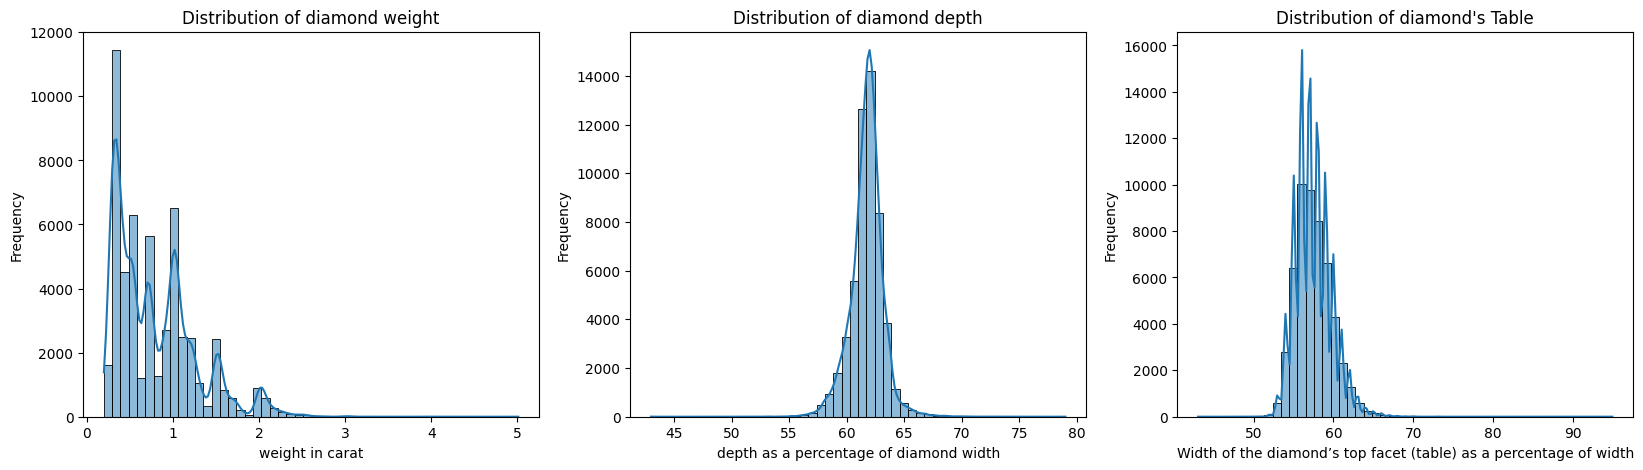

In [1097]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['carat'], bins=50, kde=True ,)
plt.title('Distribution of diamond weight')
plt.xlabel('weight in carat')
plt.ylabel('Frequency')
plt.subplot(1, 3, 1)

plt.subplot(1, 3, 2)
sns.histplot(df['depth'], bins=50, kde=True)
plt.title('Distribution of diamond depth')
plt.xlabel('depth as a percentage of diamond width')
plt.ylabel('Frequency')


plt.subplot(1, 3, 3)
sns.histplot(df['table'], bins=50, kde=True)
plt.title('Distribution of diamond\'s Table')
plt.xlabel('Width of the diamond’s top facet (table) as a percentage of width')
plt.ylabel('Frequency')

plt.show()

> from the histograms it can be shown that both the features `depth` and `table` are almost normally distributed with little to no skewness (and no negative values), However the `weight` feature is non-normal with heavy right skew (positive skew) and it's multi-modial (has multiple peaks) that maybe diamonds have some standard common weights

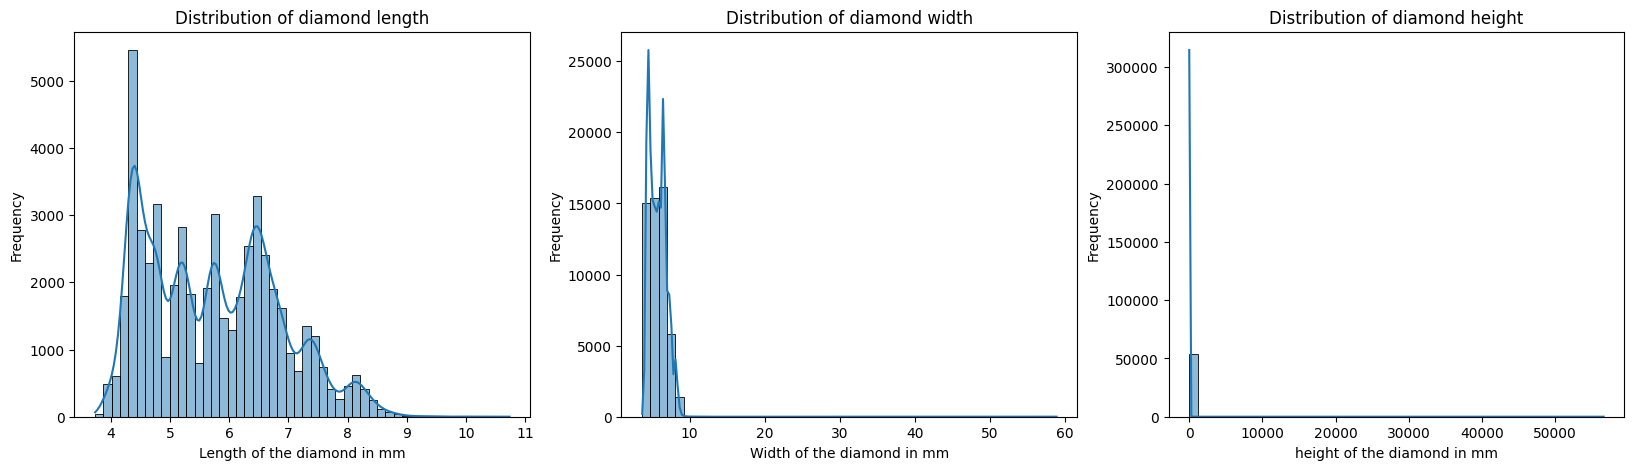

In [1098]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['x'], bins=50, kde=True ,)
plt.title('Distribution of diamond length')
plt.xlabel('Length of the diamond in mm')
plt.ylabel('Frequency')
plt.subplot(1, 3, 1)

plt.subplot(1, 3, 2)
sns.histplot(df['y'], bins=50, kde=True)
plt.title('Distribution of diamond width')
plt.xlabel('Width of the diamond in mm')
plt.ylabel('Frequency')


plt.subplot(1, 3, 3)
sns.histplot(df['z'], bins=50, kde=True)
plt.title('Distribution of diamond height')
plt.xlabel('height of the diamond in mm')
plt.ylabel('Frequency')

plt.show()

> X: distribution is multimodial (has many peaks) which suggests that diamonds maybe come with standard sizes, there's a slight right skew, but data is overall healthly spread

> Y: There are extreme outliers, nearly going up to 60mm, almost normally distributed between 4mm and 10mm

> Z: has some serious data quality issues, like the huge spike around 0 (data very close to zero e.g. 0.000000001) which is physically impossible, also the huge outlier tail going beyond 50,000mm (some 50 meters) which clearly indicates a data input level issues.

In [1099]:
df.drop(columns='z' , inplace=True)

df['z-cal'] = ((df['depth'] * (df['x'] + df['y']) / 200)).round(2)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z-cal
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.44
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


since the orignial `z` data is corrupted, it will be hardly calculated from other dims instead 

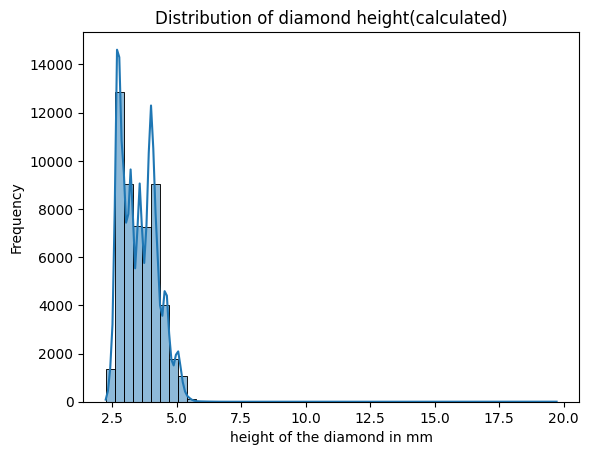

In [1100]:
sns.histplot(df['z-cal'], bins=50, kde=True)
plt.title('Distribution of diamond height(calculated)')
plt.xlabel('height of the diamond in mm')
plt.ylabel('Frequency')

plt.show()

> after fixing the height data `z`, it's noticable that it is also normally distributed (almost), and it positively skewed too

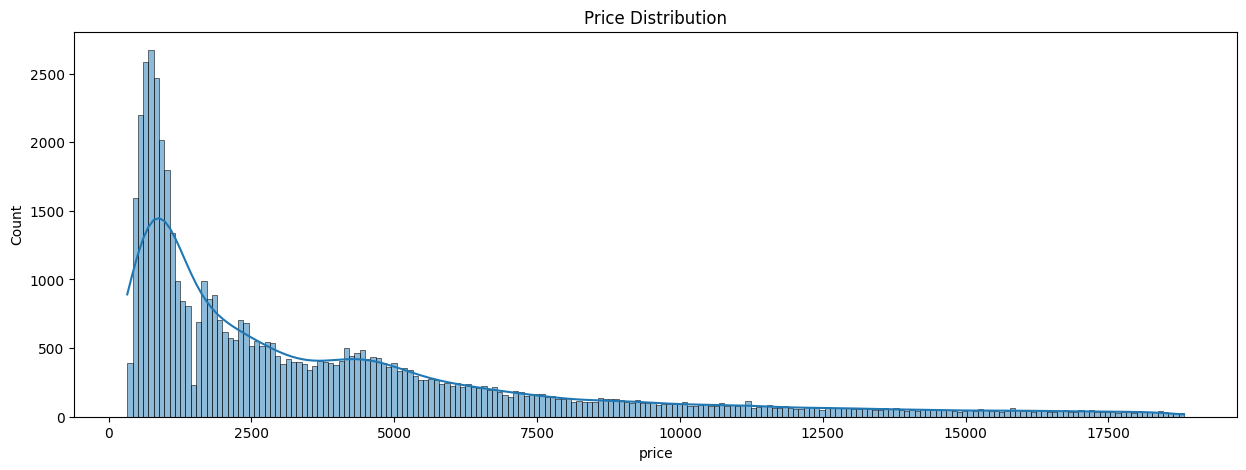

In [1101]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='price', bins=200, kde=True)
plt.title("Price Distribution")
plt.show()

> The price distribution is right skewed, prices range (from ~ $312 to ~ $20000) which may hint at potential outliers

#### Checking Outliers

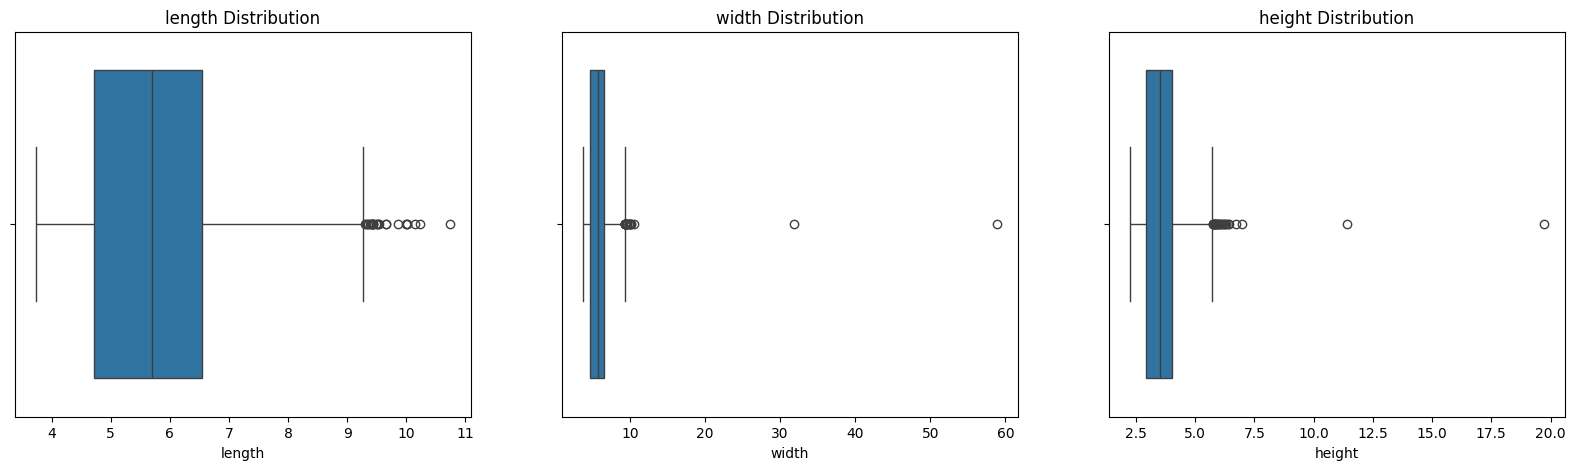

In [1102]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='x', data=df)
plt.title('length Distribution')
plt.xlabel('length')

plt.subplot(1, 3, 2)
sns.boxplot(x='y', data=df)
plt.title('width Distribution')
plt.xlabel('width')

plt.subplot(1, 3, 3)
sns.boxplot(x='z-cal', data=df)
plt.title('height Distribution')
plt.xlabel('height')

plt.show()

> X: no extreme outliers, although near 11mm needs to be validated (maybe one data point)

> Y: potential extreme oultliers (just two data points) at 30mm and 60mm

> Z: potential oultliers (just two data points) at 11.5mm and ~19.7mm


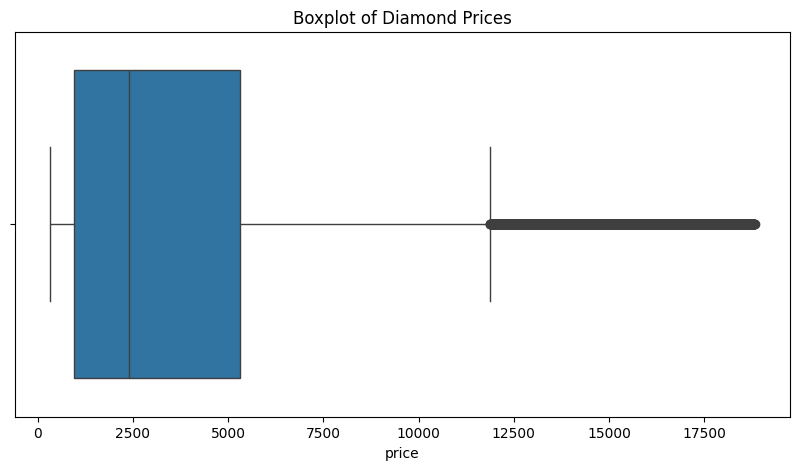

In [1103]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Diamond Prices')
plt.show()

> The boxplot of prices shows prescence of outliers, however those may be some premium rare diamonds (not neccessarly errors),
also it can be seen that IQR spans between $1000 to $5000 (50% of diamonds)

#### Analysing Categorical Data

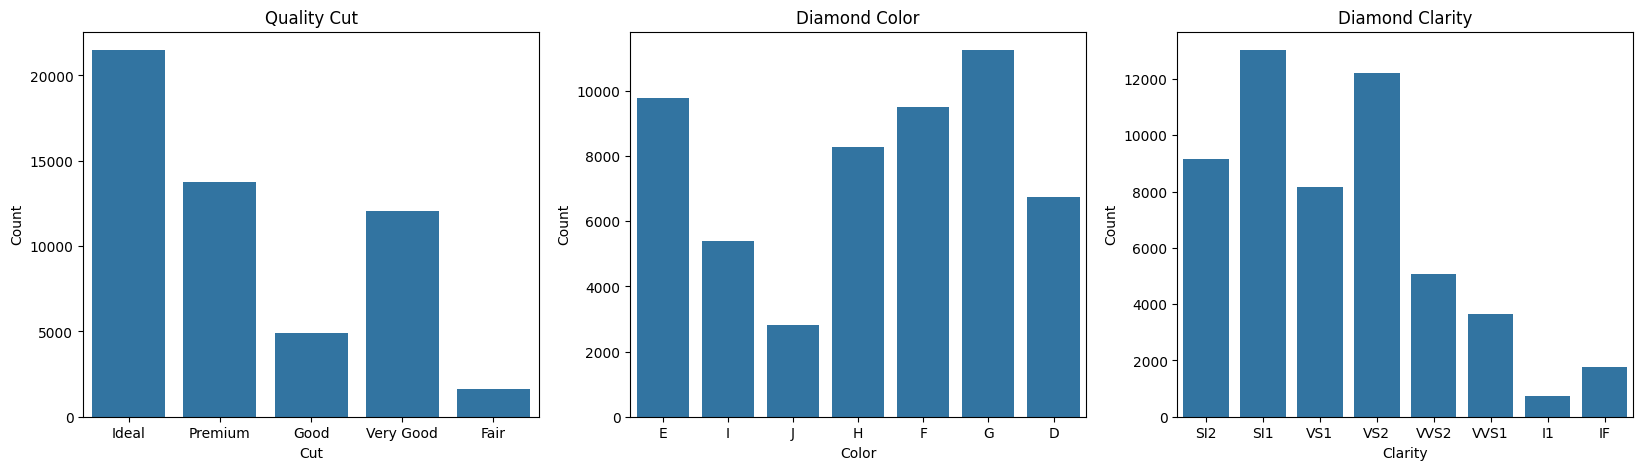

In [1104]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='cut', data=df)
plt.title('Quality Cut')
plt.xlabel('Cut')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(x='color', data=df)
plt.title('Diamond Color')
plt.xlabel('Color')
plt.ylabel('Count')


plt.subplot(1, 3, 3)
sns.countplot(x='clarity', data=df)
plt.title('Diamond Clarity')
plt.xlabel('Clarity')
plt.ylabel('Count')

plt.show()


> Quality Cut: More than 20000 diamonds are ideally cut, while only a few are fairly cut (only 1000 diamonds)

> Color: More than 10000 of diamonds are G color rated (good) which means they are "almost colorless", while only 3000 diamonds are J color rated which means they are yellowish (badly colored) 

> Clarity: Only 1000 diamonds are excellently clear (I1) while the rest are average (which is quite surprising!)

#### Checking Relationships

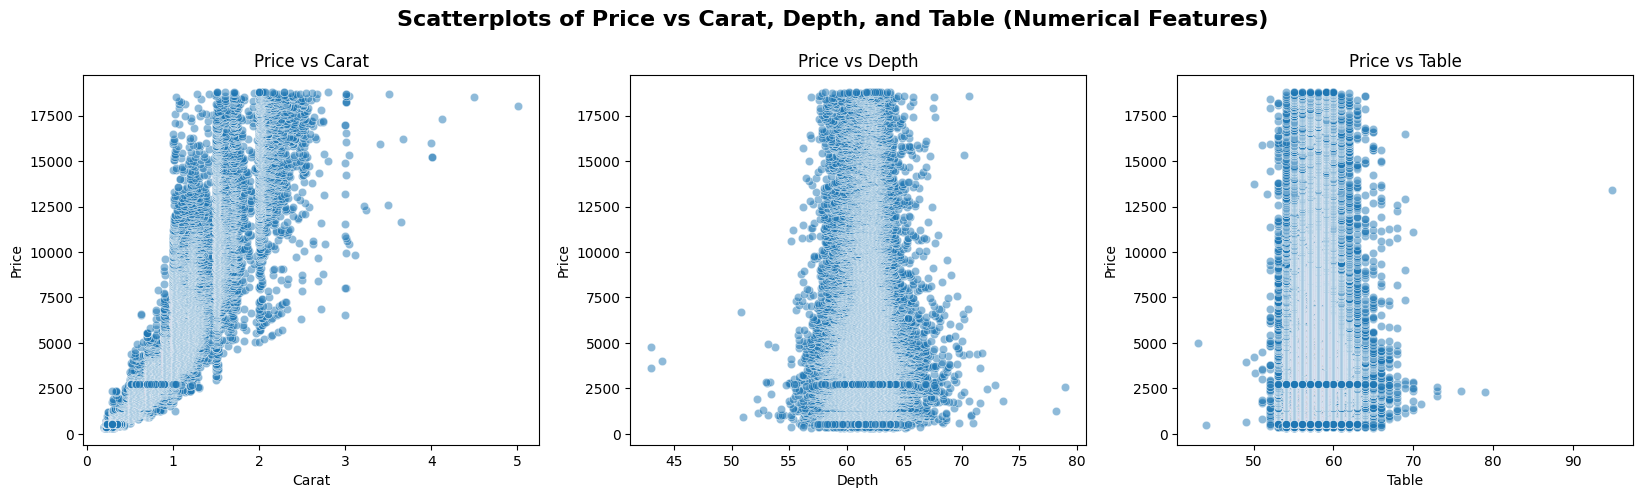

In [1105]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='carat', y='price', alpha=0.5)
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='depth', y='price', alpha=0.5)
plt.title('Price vs Depth')
plt.xlabel('Depth')
plt.ylabel('Price')


plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='table', y='price', alpha=0.5)
plt.title('Price vs Table')
plt.xlabel('Table')
plt.ylabel('Price')

plt.suptitle('Scatterplots of Price vs Carat, Depth, and Table (Numerical Features)', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.85)
plt.show()

> Price vs Carat: Strong positive correlation (price increases exponentially), it's evident `Carat` is one of the most influential predictors of `price`

> Price vs Depth: No clear correlation between `depth` and `price` (depth is important for quality, but not linearly related to price)

> Price vs Table: Similar to `depth`, `Table` width is not strongly influential on `price`

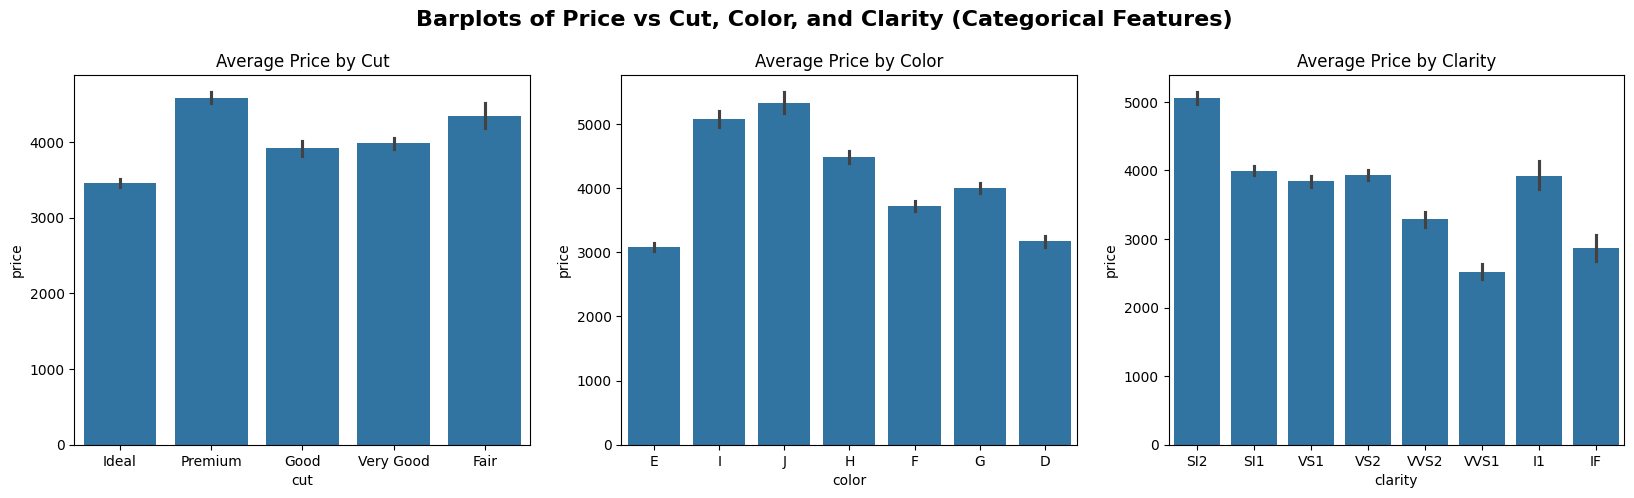

In [1106]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='cut', y='price', data=df)
plt.title("Average Price by Cut")

plt.subplot(1, 3, 2)
sns.barplot(x='color', y='price', data=df)
plt.title("Average Price by Color")

plt.subplot(1, 3, 3)
sns.barplot(x='clarity', y='price', data=df)
plt.title("Average Price by Clarity")

plt.suptitle('Barplots of Price vs Cut, Color, and Clarity (Categorical Features)', fontsize=16, fontweight= 'bold')
plt.subplots_adjust(top=0.85)
plt.show()

> Average Price by Cut: From the way all prices are somehow close (and the prices of the fair and premium cuts are not very far apart + the ideal cut is weirdly least priced), we can tell that the quality `cut` feature is not a strong predictor for `price`

> Average Price by Color: The D color rated "Colorless" diamonds have a price of ~ $3200, yet the J color rated "Yellowish" diamonds have a price of ~ $5500, shows that `color` is an imporntant quality feature but not one of the prime infleuncers on the diamond `price`

> Average Price by Clarity: Plot shows no direct relation between `clarity` (ranging from I1 "Best" to VVS1 "Worst") and overall pricing of the diamonds (no direct realtionship)

### Correlation Matrix

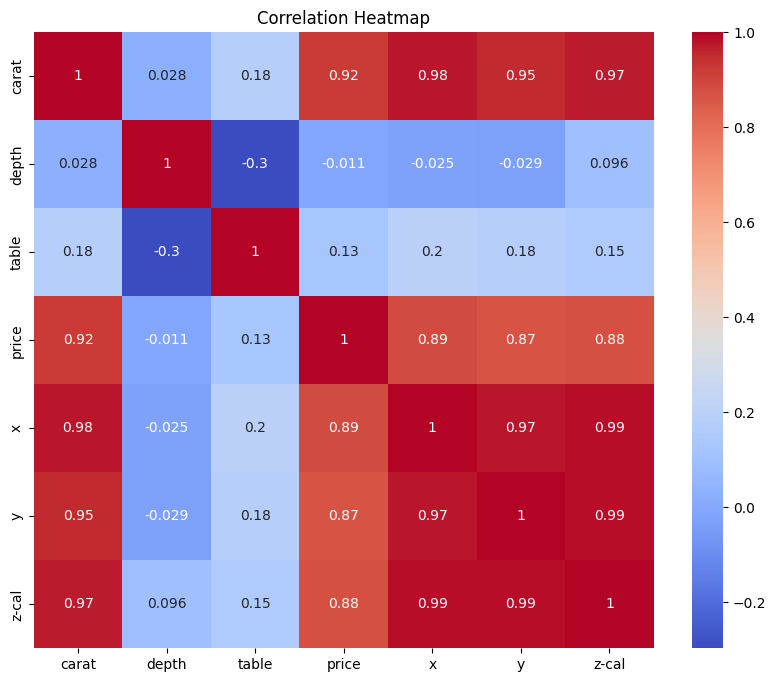

In [1107]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

*Insights:*

> Strong multicollinearity between `x`, `y`, and `z` (>97%), as they are physical dimensions they are naturally correlated, hence they carry redundant information (not all of them may be needed) 

> `Depth` has a weak negative correlation with `price` (-0.011), which means this feature may not add much predictive power over it

> `Price` has strong positive correlation with `carat` (0.92) which means that the weight of a diamond in `carat` directly influnces the pricing of it (Bigger diamonds (in weight) are much more expensive) 

*Conclusion:* `Carat` is the most important single predictor for `price`.

------------------------------------------------------------------------------------------

## Outliers Handlling:

> Handelling Outliers by Winsorizing to avoid Extreme outliers While perserving original behaviour of data as much as possible

In [1108]:
lower_limit = 0.0001 
upper_limit = 0.0001 

df['x_wins'] = winsorize(df['x'], limits=(lower_limit, upper_limit))
df['y_wins'] = winsorize(df['y'], limits=(lower_limit, upper_limit))
df['z_cal_wins'] = winsorize(df['z-cal'], limits=(lower_limit, upper_limit))

### Check results:

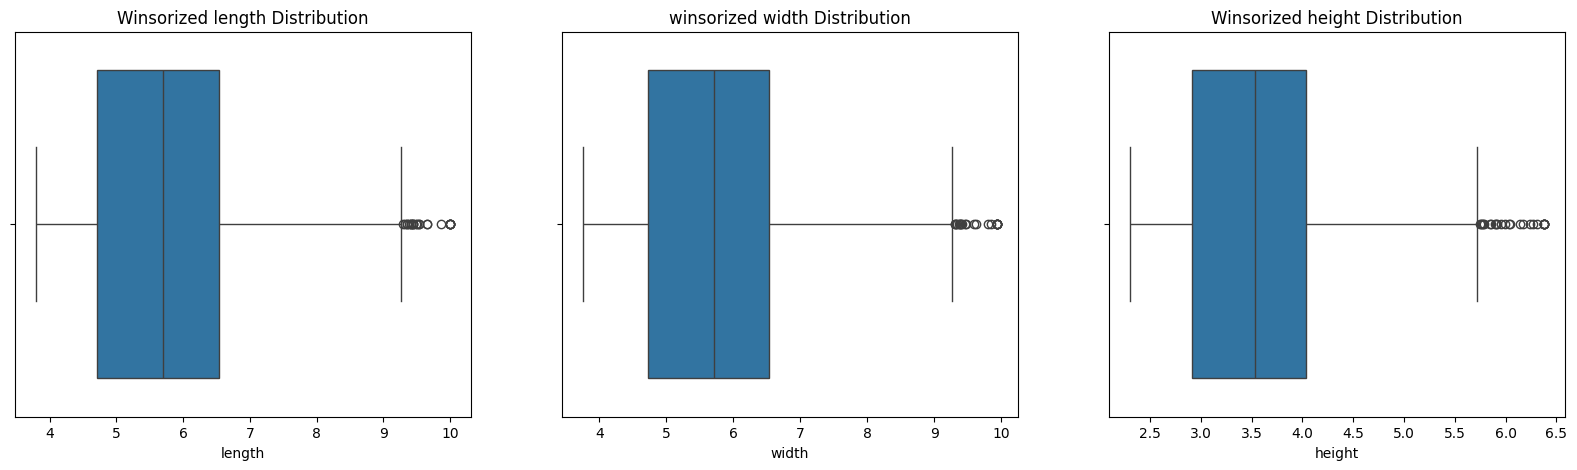

In [1109]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='x_wins', data=df)
plt.title('Winsorized length Distribution')
plt.xlabel('length')

plt.subplot(1, 3, 2)
sns.boxplot(x='y_wins', data=df)
plt.title('winsorized width Distribution')
plt.xlabel('width')

plt.subplot(1, 3, 3)
sns.boxplot(x='z_cal_wins', data=df)
plt.title('Winsorized height Distribution')
plt.xlabel('height')

plt.show()

> As shown, by Winsorizing to (0.0001,0.0001), the extreme suspicious outliers (> 10mm) where successfully handeled, while keeping those outliers that are not much extreme or even might be plausible in certain scenarios

-----------------

## Feature Engineering:

### Generating New Features

In [1110]:
df['volume'] = df['x_wins'] * df['y_wins'] * df['z_cal_wins']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z-cal,x_wins,y_wins,z_cal_wins,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.44,3.95,3.98,2.44,38.359240
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.34,4.35,2.75,51.917250


#### Anlaysing New Features

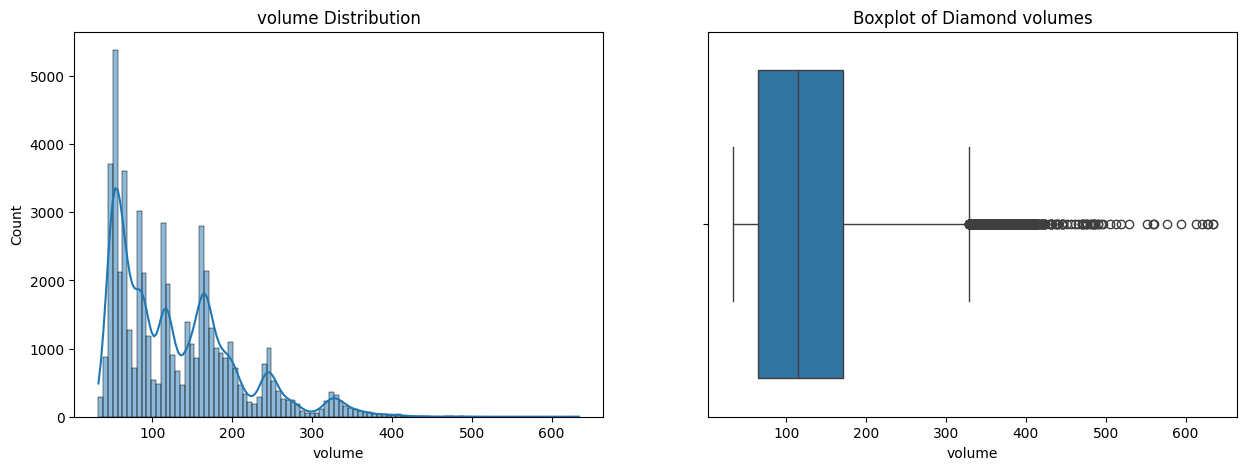

In [1111]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='volume', bins=100, kde=True)
plt.title("volume Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['volume'])
plt.title('Boxplot of Diamond volumes')
plt.show()

> Volume Histogram: Much like th dims it was derived from, th `volume` feature is strongly right skewed, with peak towards 0 indicates potential outliers

> Volume Boxplot: There are some plausible outliers byeond 600 mm^3

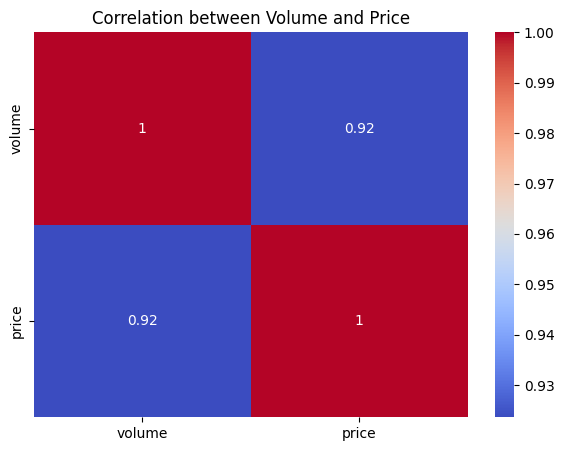

In [1112]:
correlation = df[['volume','price']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Volume and Price")
plt.show()

> The new calculated Feature `Volume` is strongly positivly correlated with `price` (the greater the volume of a diamond the more expensive it becomes), Hence, `volume` is a valuable feature with and a strong Infleuencial predictor of `price` 

### Encoding Categorical Data

In [1113]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [1114]:
order = {'Ideal':1, 'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5}
df['cut_encoded'] = df['cut'].map(order)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z-cal,x_wins,y_wins,z_cal_wins,volume,cut_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.44,3.95,3.98,2.44,38.359240,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.89,3.84,2.31,34.505856,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.05,4.07,2.31,38.076885,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20,4.23,2.63,46.724580,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.34,4.35,2.75,51.917250,3


In [1115]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [1116]:
order1 = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}
df['col_encoded'] = df['color'].map(order1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z-cal,x_wins,y_wins,z_cal_wins,volume,cut_encoded,col_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.44,3.95,3.98,2.44,38.359240,1,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.89,3.84,2.31,34.505856,2,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.05,4.07,2.31,38.076885,3,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20,4.23,2.63,46.724580,2,6
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.34,4.35,2.75,51.917250,3,7


In [1117]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

#### Encoding using OridinalEncoding with category order set

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1','VVS2', 'VVS1','IF']])
encoded = ordinal_encoder.fit_transform(df[['clarity']])
df['clarity_encoded'] = encoded.astype(int) +1

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z-cal,x_wins,y_wins,z_cal_wins,volume,cut_encoded,col_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.44,3.95,3.98,2.44,38.359240,1,2,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.89,3.84,2.31,34.505856,2,2,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.05,4.07,2.31,38.076885,3,2,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20,4.23,2.63,46.724580,2,6,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.34,4.35,2.75,51.917250,3,7,2


-----------------------------------------------------

## Data Transformation:

### Log Transforms
> ***Goal:* Reducing the effect of Skewness (positive Skewness)**

In [1120]:
df['log_carat'] = np.log(df['carat'])
df['log_table'] = np.log(df['table'])

df['log_price'] = np.log(df['price'])

In [1121]:
# using np.log1p() instead of np.log() to handle zero values safely
df['log_volume'] = np.log1p(df['volume'])

#### Checking Results:

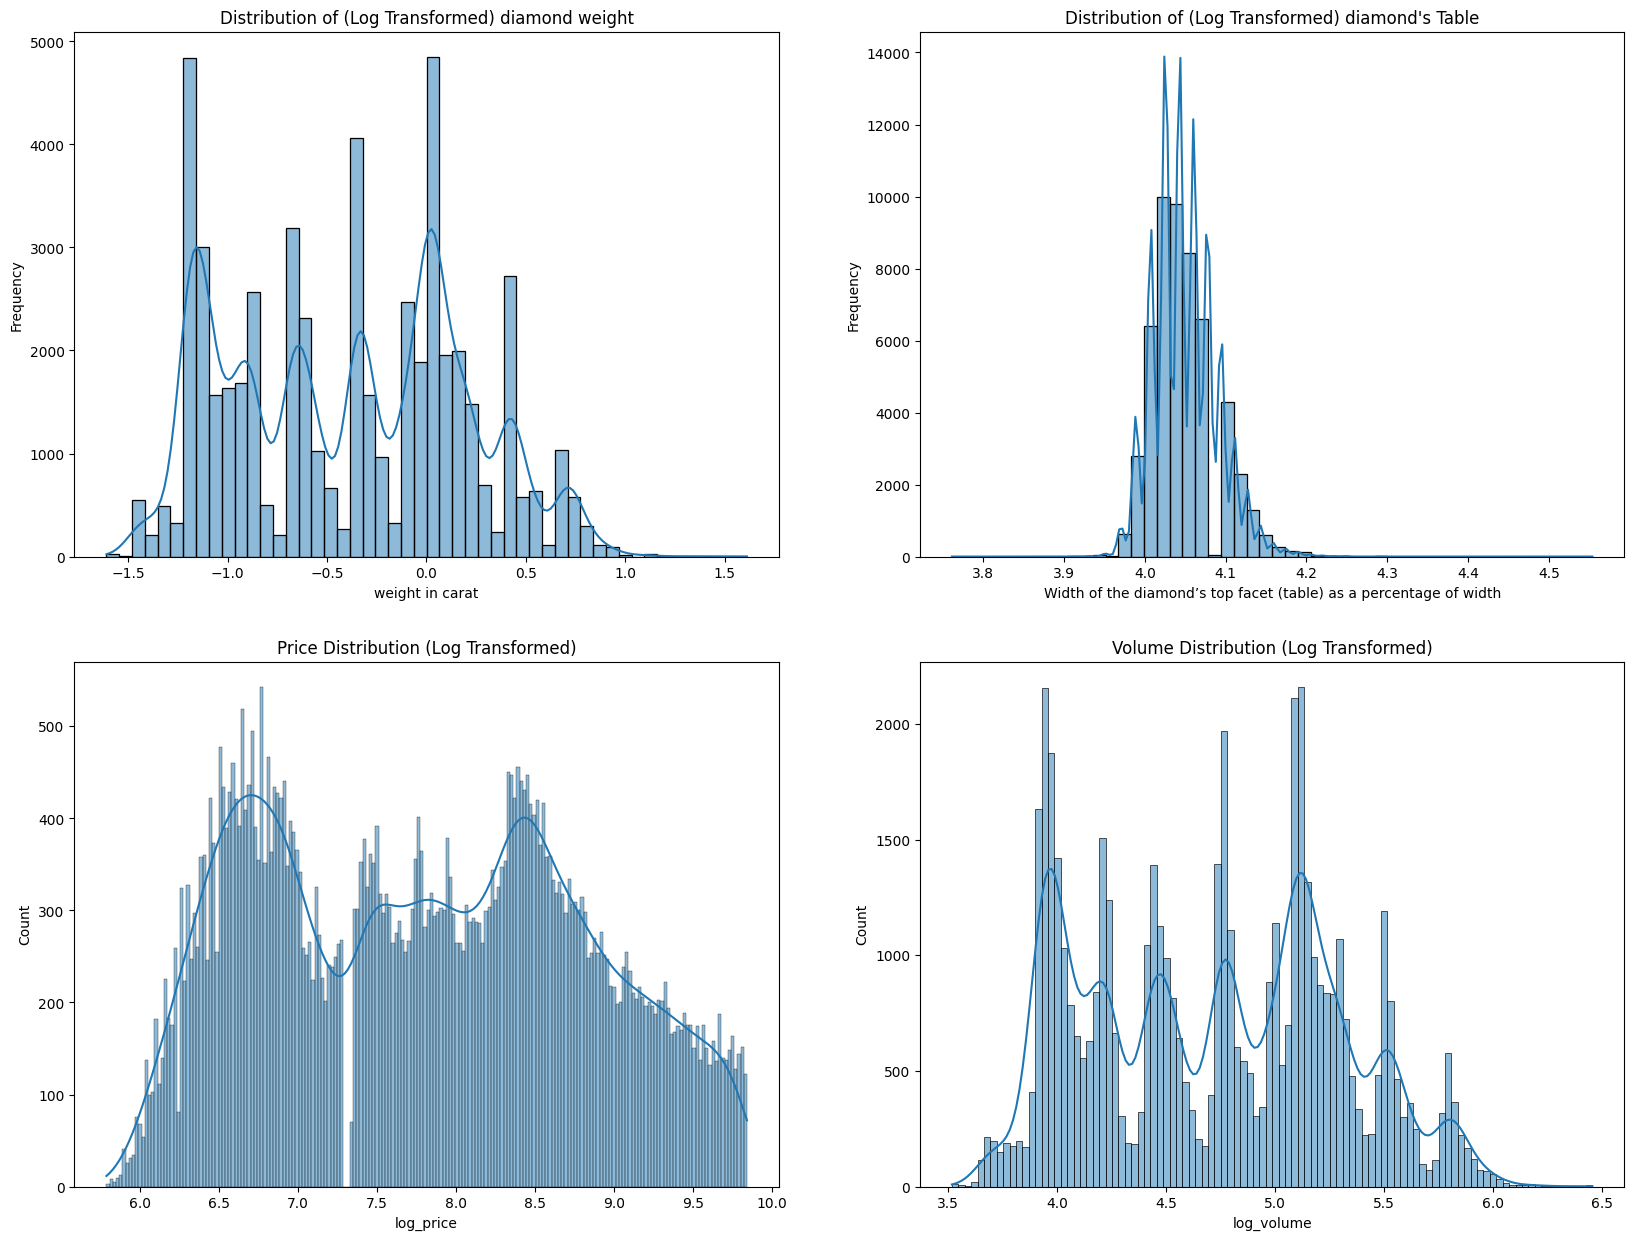

In [1122]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.histplot(df['log_carat'], bins=50, kde=True ,)
plt.title('Distribution of (Log Transformed) diamond weight')
plt.xlabel('weight in carat')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['log_table'], bins=50, kde=True)
plt.title('Distribution of (Log Transformed) diamond\'s Table')
plt.xlabel('Width of the diamond’s top facet (table) as a percentage of width')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='log_price', bins=200, kde=True)
plt.title("Price Distribution (Log Transformed)")

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='log_volume', bins=100, kde=True)
plt.title("Volume Distribution (Log Transformed)")

plt.show()

> The Histogram visually showed how "Log Transformation" successfully eased the severity of the outliers, as each distribution beacame gaussian-like

*Important Note:* 

> Except for `table`, The transformed Histograms shows multi-modial behaviour for both `carat` and `volume` (which indicates they can be binned or bucketed into multiple bins) and similar bi-modial behaviour for `price` (shall be divided to two main bins/clusters), with each bin being nomally distributed thanks to "Log Transformation"

### Scaling:

> ***Goal:* Ensuring all data falls within a Certain Range in order to Prevent Feature Domination**

In [1123]:
# Using StandardScaler for Gaussian-like (no outliers data)

scaler = StandardScaler()

df['scaled_log_carat'] = scaler.fit_transform(df[['log_carat']])
df['scaled_depth'] = scaler.fit_transform(df[['depth']])
df['scaled_log_table'] = scaler.fit_transform(df[['log_table']])

In [1124]:
# Using RobustScaler for data with potential Outliers

Rscaler = RobustScaler()

df['scaled_log_price'] = Rscaler.fit_transform(df[['log_price']])
df['scaled_log_volume'] = Rscaler.fit_transform(df[['log_volume']])

#### Checking Results:

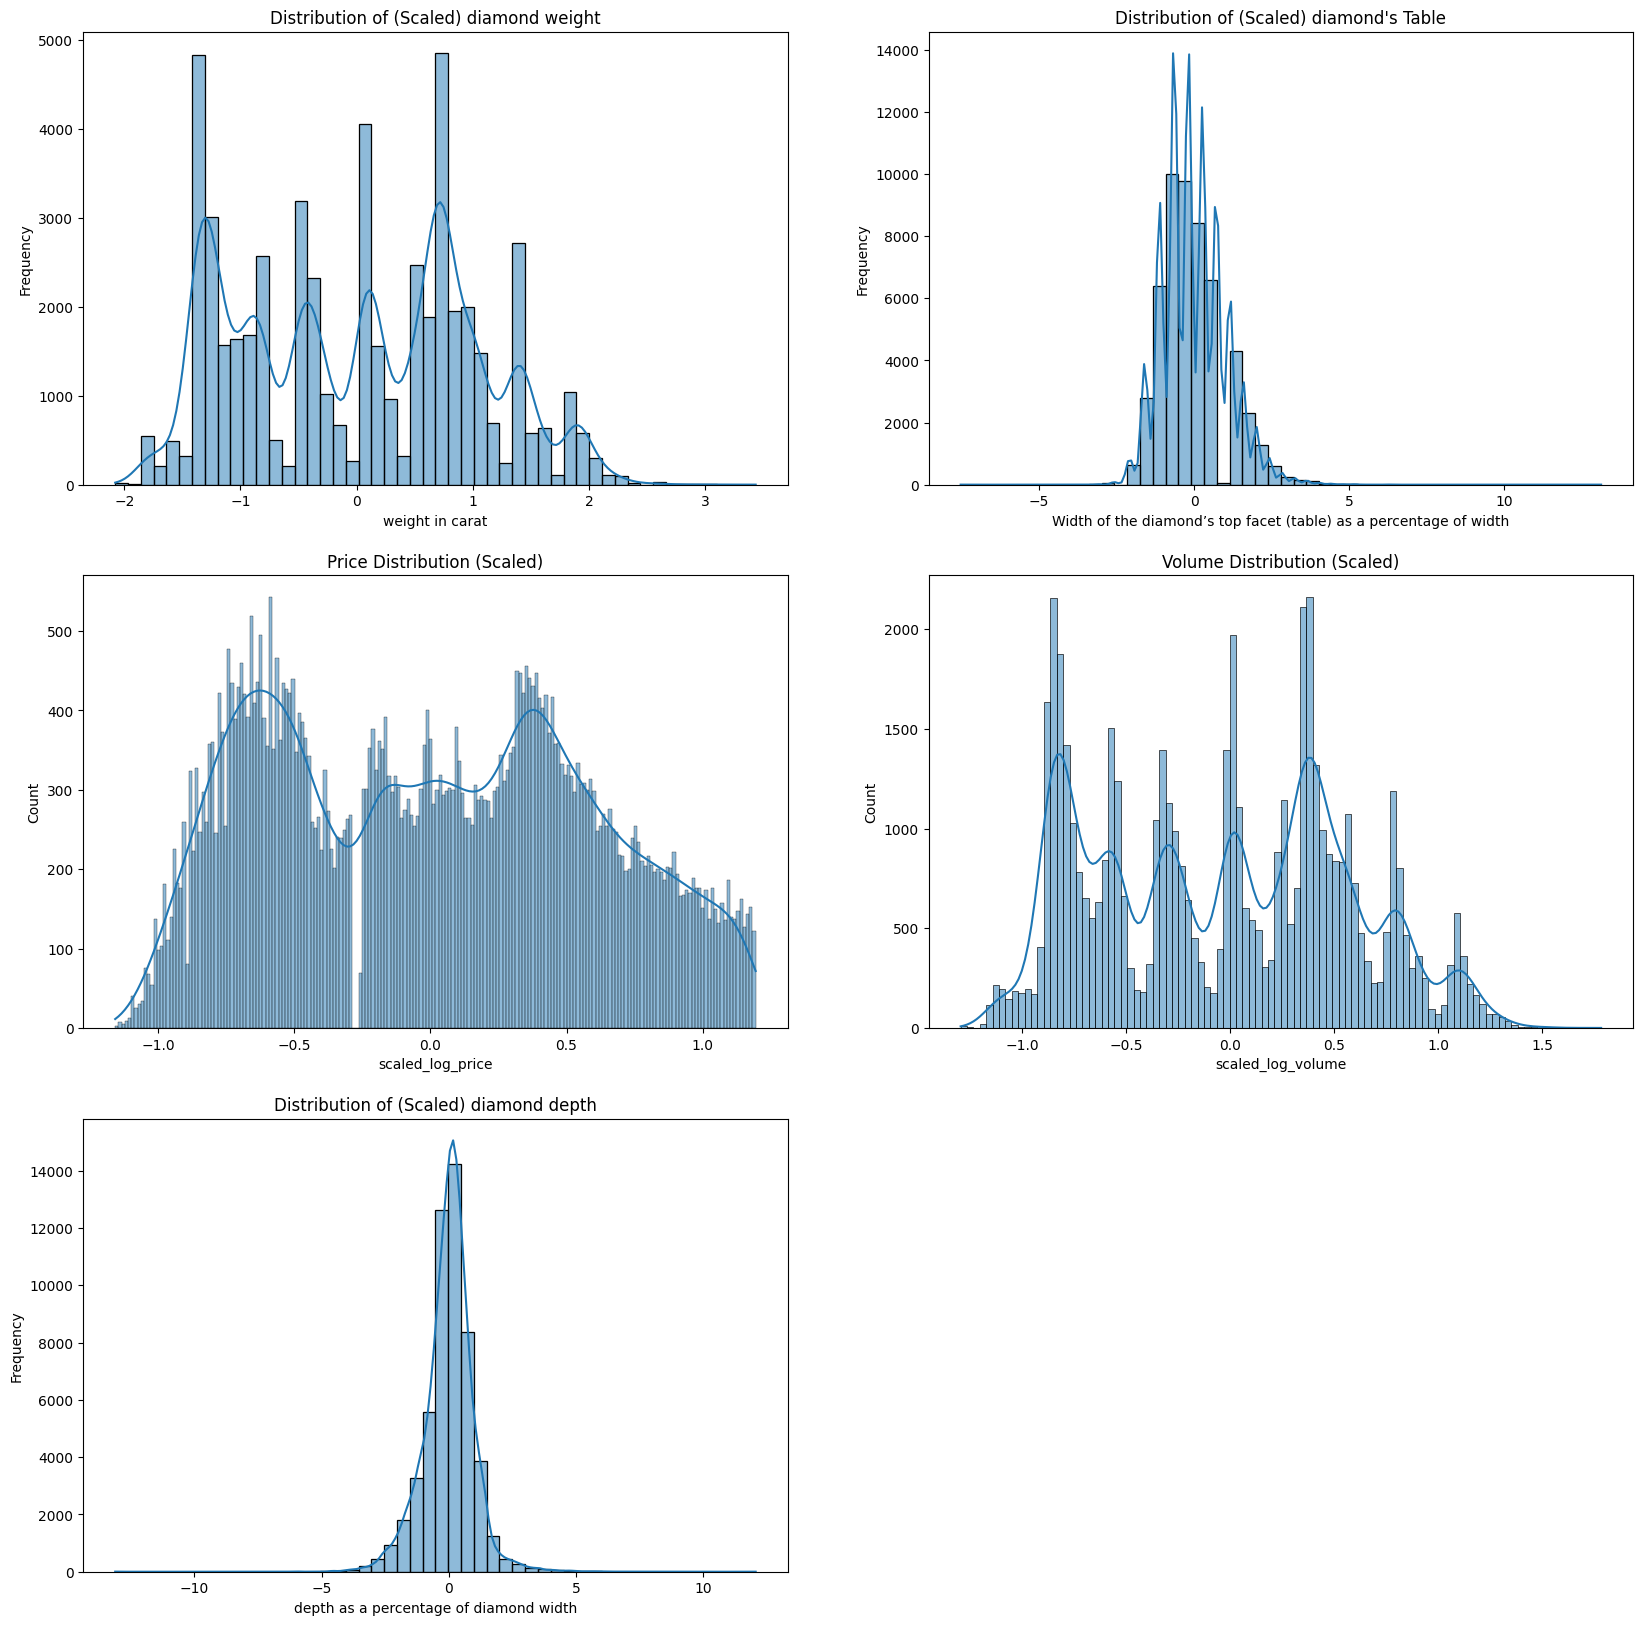

In [1125]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.histplot(df['scaled_log_carat'], bins=50, kde=True ,)
plt.title('Distribution of (Scaled) diamond weight')
plt.xlabel('weight in carat')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.histplot(df['scaled_log_table'], bins=50, kde=True)
plt.title('Distribution of (Scaled) diamond\'s Table')
plt.xlabel('Width of the diamond’s top facet (table) as a percentage of width')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.histplot(data=df, x='scaled_log_price', bins=200, kde=True)
plt.title("Price Distribution (Scaled)")

plt.subplot(3, 2, 4)
sns.histplot(data=df, x='scaled_log_volume', bins=100, kde=True)
plt.title("Volume Distribution (Scaled)")

plt.subplot(3, 2, 5)
sns.histplot(df['scaled_depth'], bins=50, kde=True)
plt.title('Distribution of (Scaled) diamond depth')
plt.xlabel('depth as a percentage of diamond width')
plt.ylabel('Frequency')

plt.show()

> It can be concluded that after sucessfully handelling extreme outliers, getting rid of unnecessary redundant features nd replacing them with those that matter, transforming skewed features and scalling them using the suitable scaler for each, that we finally reached the desired state of cleaned gracefully distributed logical data which is ready to be taken to next step "Modelling"

----------------------

## Saving The Processed data:

In [1126]:
pd.set_option('display.max_columns', None)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z-cal,x_wins,y_wins,z_cal_wins,volume,cut_encoded,col_encoded,clarity_encoded,log_carat,log_table,log_price,log_volume,scaled_log_carat,scaled_depth,scaled_log_table,scaled_log_price,scaled_log_volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.44,3.95,3.98,2.44,38.359240,1,2,2,-1.469676,4.007333,5.786897,3.672731,-1.838841,-0.173488,-1.119495,-1.159109,-1.132121
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.89,3.84,2.31,34.505856,2,2,3,-1.560648,4.110874,5.786897,3.569698,-1.994497,-1.362456,1.577518,-1.159109,-1.240167
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.05,4.07,2.31,38.076885,3,2,5,-1.469676,4.174387,5.789960,3.665531,-1.838841,-3.390697,3.231906,-1.157331,-1.139670
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20,4.23,2.63,46.724580,2,6,4,-1.237874,4.060443,5.811141,3.865447,-1.442220,0.455966,0.263902,-1.145035,-0.930027
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.34,4.35,2.75,51.917250,3,7,2,-1.171183,4.060443,5.814131,3.968729,-1.328109,1.085421,0.263902,-1.143300,-0.821719


In [1127]:
df.shape

(53787, 26)

### Dropping unnecessary (replaced columns)

In [1128]:
df_cleaned = df.drop(columns=['carat','cut','color','clarity','depth','table','price','x','y','z-cal','x_wins','y_wins','z_cal_wins','log_carat','log_table','log_volume'])
df_cleaned.head()

,volume,cut_encoded,col_encoded,clarity_encoded,log_price,scaled_log_carat,scaled_depth,scaled_log_table,scaled_log_price,scaled_log_volume
0,38.359240,1,2,2,5.786897,-1.838841,-0.173488,-1.119495,-1.159109,-1.132121
1,34.505856,2,2,3,5.786897,-1.994497,-1.362456,1.577518,-1.159109,-1.240167
2,38.076885,3,2,5,5.789960,-1.838841,-3.390697,3.231906,-1.157331,-1.139670
3,46.724580,2,6,4,5.811141,-1.442220,0.455966,0.263902,-1.145035,-0.930027
4,51.917250,3,7,2,5.814131,-1.328109,1.085421,0.263902,-1.143300,-0.821719


### Exporting Data as ".csv" file

In [1129]:
df_cleaned.to_csv('Processed_Diamond.csv', index= False)

----------------
--------------------